# Models Experiments

In [1]:
# LIBRARIES IMPORTING

# interact with OS
import os

# Array Manipulation
import numpy as np

# Models
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Hyperparameter Optimization
from sklearn.model_selection import RandomizedSearchCV

# Utils Scripts
from utils import model_evaluation


In [2]:
# GLOBAL CONSTANTS
SEED = 1

In [3]:
# Read train, test, and validation datasets from last dataset folder
data_dir = os.path.join('./data',
                        os.listdir('./data')[-1])

X_train = np.genfromtxt(os.path.join(data_dir,
                                     'X_train.csv'), delimiter=',')
X_val   = np.genfromtxt(os.path.join(data_dir,
                                     'X_val.csv'), delimiter=',')
X_test  = np.genfromtxt(os.path.join(data_dir,
                                     'X_test.csv'), delimiter=',')
y_train = np.genfromtxt(os.path.join(
        data_dir,
        'y_train.csv'), delimiter=',')
y_val   = np.genfromtxt(os.path.join(
        data_dir,
        'y_val.csv'), delimiter=',')
y_test  = np.genfromtxt(os.path.join(
        data_dir,
        'y_test.csv'), delimiter=',')

## Baseline Model : Random Forest Classifier

Model Performance metrics:
------------------------------
Accuracy: 0.7307
Precision: 0.4831
Recall: 0.0356
F1 Score: 0.0663
Roc-Auc Score: 0.631

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         0.0       0.74      0.99      0.84      3291
         1.0       0.48      0.04      0.07      1209

    accuracy                           0.73      4500
   macro avg       0.61      0.51      0.45      4500
weighted avg       0.67      0.73      0.63      4500


Prediction Confusion Matrix:
------------------------------
      0   1
0  3245  46
1  1166  43


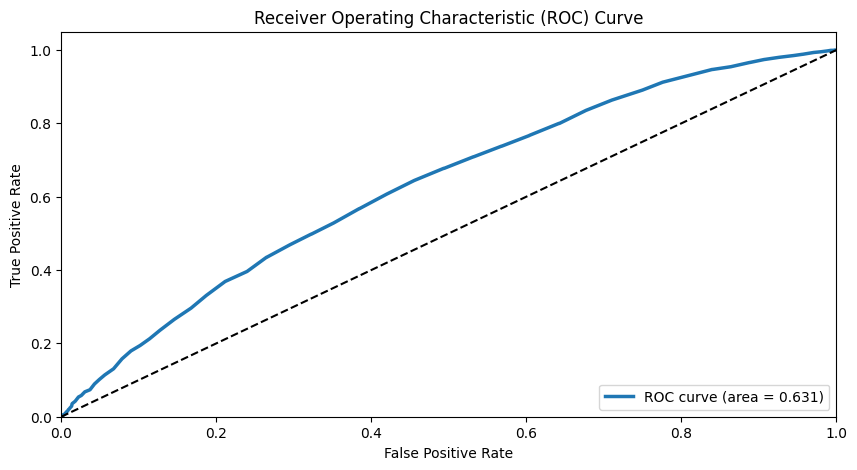

The times of this experiment are:

TIMES

Training took: 5.3059
Prediction on Validation set took: 0.1179
Prediction on Test set took: -


In [4]:
# Define baseline model
baseline_classifier = RandomForestClassifier(random_state=SEED,
                                             n_jobs=-1,
                                             class_weight='balanced'
                                             )
# Make experiment and store it
baseline_classifier= model_evaluation.make_experiment(alg_name='rf',
                                                      data_dir=data_dir,
                                                      model=baseline_classifier,
                                                      X_train=X_train,
                                                      y_train=y_train,
                                                      X_val=X_val,
                                                      y_val=y_val,
                                                      X_test=X_test,
                                                      y_test=y_test)

## Lightgbm

Model Performance metrics:
------------------------------
Accuracy: 0.6002
Precision: 0.3595
Recall: 0.6245
F1 Score: 0.4563
Roc-Auc Score: 0.6556

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         0.0       0.81      0.59      0.68      3291
         1.0       0.36      0.62      0.46      1209

    accuracy                           0.60      4500
   macro avg       0.59      0.61      0.57      4500
weighted avg       0.69      0.60      0.62      4500


Prediction Confusion Matrix:
------------------------------
      0     1
0  1946  1345
1   454   755


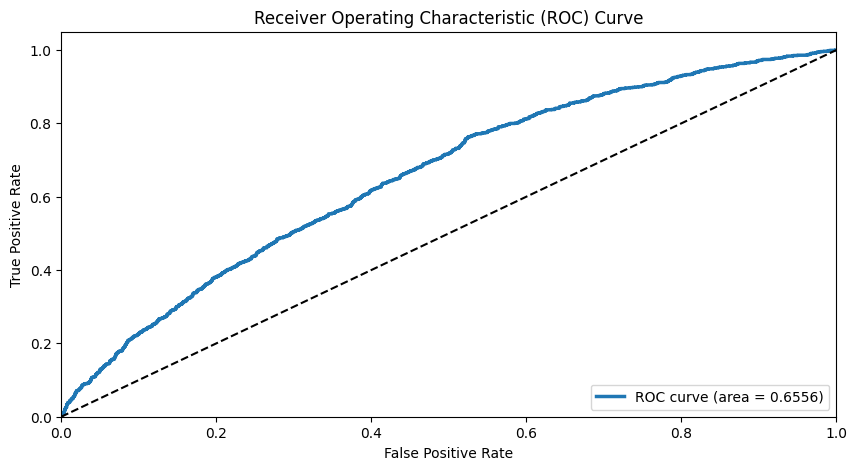

The times of this experiment are:

TIMES

Training took: 0.4721
Prediction on Validation set took: 0.0067
Prediction on Test set took: -


In [5]:
# Try with another classifier
lgb_clf = LGBMClassifier(random_state=SEED,
                         objective='binary',
                         class_weight='balanced')

# Make experiment and store it
lgb_clf = model_evaluation.make_experiment(alg_name='lgbm',
                                           data_dir=data_dir,
                                           model=lgb_clf,
                                           X_train=X_train,
                                           y_train=y_train,
                                           X_val=X_val,
                                           y_val=y_val,
                                           X_test=X_test,
                                           y_test=y_test)

#### Hyperparameter Optimization

Model Performance metrics:
------------------------------
Accuracy: 0.562
Precision: 0.3409
Recall: 0.6749
F1 Score: 0.453
Roc-Auc Score: 0.6344

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         0.0       0.81      0.52      0.63      3291
         1.0       0.34      0.67      0.45      1209

    accuracy                           0.56      4500
   macro avg       0.58      0.60      0.54      4500
weighted avg       0.69      0.56      0.59      4500


Prediction Confusion Matrix:
------------------------------
      0     1
0  1713  1578
1   393   816


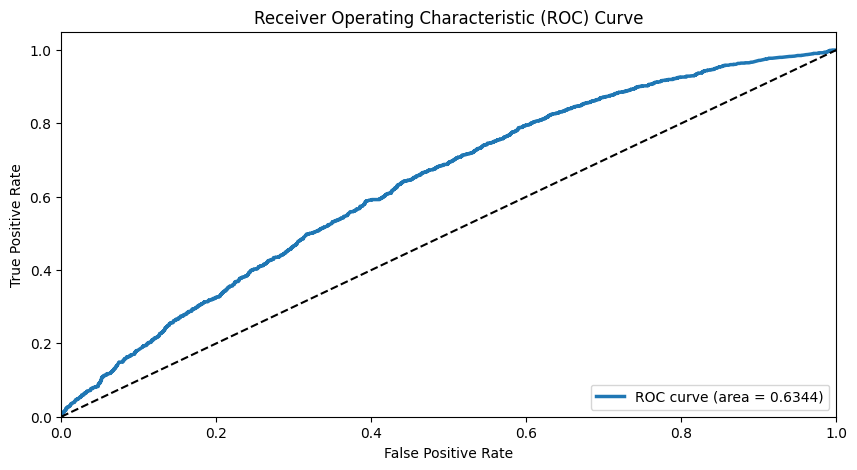

Model Performance metrics:
------------------------------
Accuracy: 0.5548
Precision: 0.3224
Recall: 0.6769
F1 Score: 0.4367
Roc-Auc Score: 0.6317

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         0.0       0.82      0.51      0.63      3725
         1.0       0.32      0.68      0.44      1275

    accuracy                           0.55      5000
   macro avg       0.57      0.59      0.53      5000
weighted avg       0.70      0.55      0.58      5000


Prediction Confusion Matrix:
------------------------------
      0     1
0  1911  1814
1   412   863


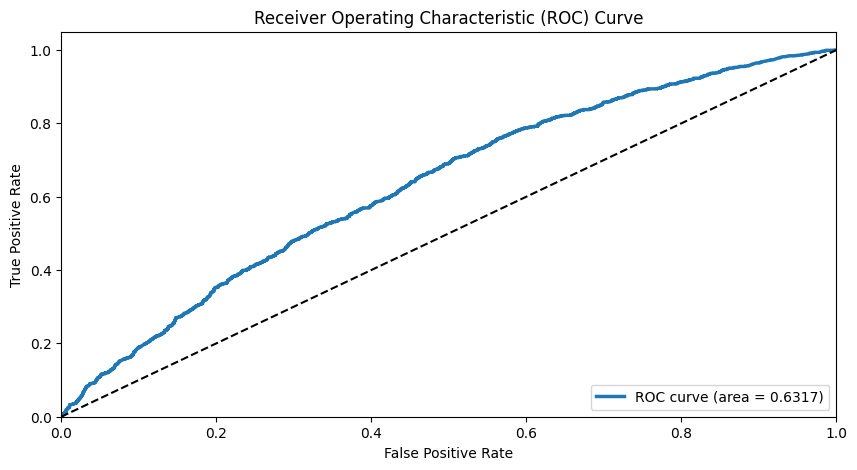

The times of this experiment are:

TIMES

Training took: 466.0463
Prediction on Validation set took: 0.0092
Prediction on Test set took: 0.0142


In [6]:
# Hyperparameter Optimization
# Parameters
params = {
    'num_leaves'   : [30, 40, 50, 60, 70, 80, 90, 100],
    'n_estimators' : [50, 100, 150, 200],
    'learning_rate': [0.1, 0.01, 0.001, 0.0001]
}
# Set RandomizedSearchCV
best_lgb_clf = RandomizedSearchCV(estimator=lgb_clf,
                                  param_distributions=params,
                                  scoring='recall',
                                  n_iter=64)

# Make experiment and store it
best_lgb_clf = model_evaluation.make_experiment(alg_name='lgbm',
                                                data_dir=data_dir,
                                                model=best_lgb_clf,
                                                X_train=X_train,
                                                y_train=y_train,
                                                X_val=X_val,
                                                y_val=y_val,
                                                X_test=X_test,
                                                y_test=y_test,
                                                CV_search=True)

## XGBoost

Model Performance metrics:
------------------------------
Accuracy: 0.7309
Precision: 0.4934
Recall: 0.062
F1 Score: 0.1102
Roc-Auc Score: 0.6415

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         0.0       0.74      0.98      0.84      3291
         1.0       0.49      0.06      0.11      1209

    accuracy                           0.73      4500
   macro avg       0.62      0.52      0.48      4500
weighted avg       0.67      0.73      0.65      4500


Prediction Confusion Matrix:
------------------------------
      0   1
0  3214  77
1  1134  75


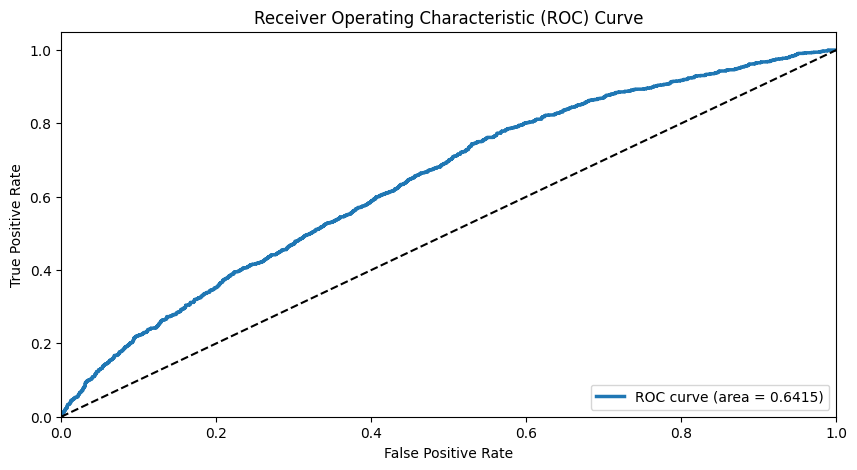

The times of this experiment are:

TIMES

Training took: 2.5954
Prediction on Validation set took: 0.0313
Prediction on Test set took: -


In [7]:
# Define model
xgb_clf = xgb.XGBClassifier(tree_method='gpu_hist',
                            objective='binary:logistic',
                            gpu_id='0',
                            eval_metric='auc',
                            seed=SEED)

# Make experiment and store it
xgb_clf = model_evaluation.make_experiment(alg_name='xgb',
                                           data_dir=data_dir,
                                           model=xgb_clf,
                                           X_train=X_train,
                                           y_train=y_train,
                                           X_val=X_val,
                                           y_val=y_val,
                                           X_test=X_test,
                                           y_test=y_test)

#### Hyperparameter Optimization

Model Performance metrics:
------------------------------
Accuracy: 0.5129
Precision: 0.33
Recall: 0.7891
F1 Score: 0.4654
Roc-Auc Score: 0.6502

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         0.0       0.84      0.41      0.55      3291
         1.0       0.33      0.79      0.47      1209

    accuracy                           0.51      4500
   macro avg       0.59      0.60      0.51      4500
weighted avg       0.70      0.51      0.53      4500


Prediction Confusion Matrix:
------------------------------
      0     1
0  1354  1937
1   255   954


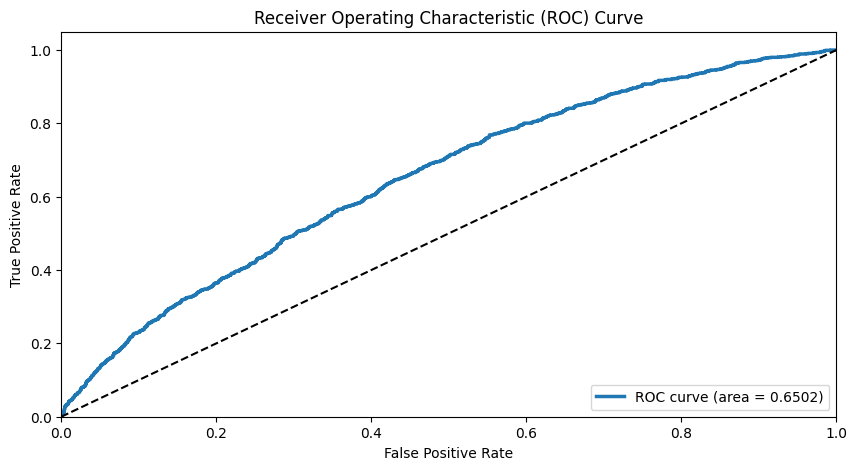

Model Performance metrics:
------------------------------
Accuracy: 0.5038
Precision: 0.3118
Recall: 0.7835
F1 Score: 0.4461
Roc-Auc Score: 0.648

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         0.0       0.85      0.41      0.55      3725
         1.0       0.31      0.78      0.45      1275

    accuracy                           0.50      5000
   macro avg       0.58      0.60      0.50      5000
weighted avg       0.71      0.50      0.52      5000


Prediction Confusion Matrix:
------------------------------
      0     1
0  1520  2205
1   276   999


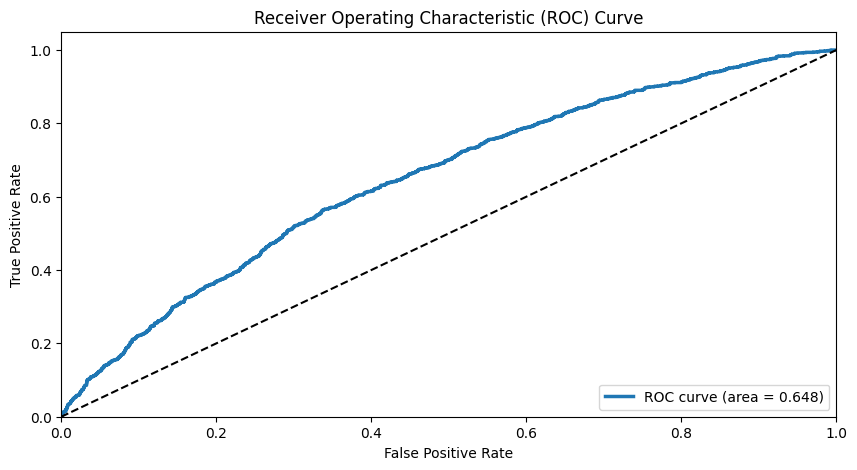

The times of this experiment are:

TIMES

Training took: 1941.6578
Prediction on Validation set took: 0.0278
Prediction on Test set took: 0.0354


In [16]:
# Parameters
params = {
    'max_depth'       : [3, 6, 10, 20, 30, 50, 100],
    'eta'             : [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    'scale_pos_weight': [1, 1.5, 2, 2.5, 3, 3.5]
}
# Set RandomizedSearchCV
best_xgb_clf = RandomizedSearchCV(estimator=xgb_clf,
                                  param_distributions=params,
                                  scoring='recall',
                                  n_iter=64,
                                  random_state=SEED)

# Make experiment and store it
best_xgb_clf = model_evaluation.make_experiment(alg_name='xgb',
                                                data_dir=data_dir,
                                                model=best_xgb_clf,
                                                X_train=X_train,
                                                y_train=y_train,
                                                X_val=X_val,
                                                y_val=y_val,
                                                X_test=X_test,
                                                y_test=y_test,
                                                CV_search=True)

In [24]:
### Save model to file
# Get best model from Random Search
best_model = best_xgb_clf.best_estimator_

# Save to file
best_model.save_model("../model/best_model.txt")

In [22]:
best_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.1,
              eval_metric='auc', feature_types=None, gamma=0, gpu_id='0',
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', ...)

In [19]:
# # Import SMOTE over sampler from imbalanced-learn library
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
#
# resampler = Pipeline(steps=[
#     ('over', SMOTE(sampling_strategy=0.4,
#                    random_state=SEED)),
#     ('under', RandomUnderSampler(sampling_strategy=0.5,
#                                  random_state=SEED))
# ])
# # Oversampling training data
# X_res, y_res = smote_resampler.fit_resample(X=X_train, y=y_train)
# X_res.shape
# # Fit the model with the resampled data
# best_lgb_clf.fit(X=X_res, y=y_res)
# # Store the prediction
# pred_res = best_lgb_clf.predict(X=X_val)
# # Evaluation Metrics
# res_metrics = model_evaluation.get_performance(predictions=pred_res,
#                                                y_test=y_val)
# res_auc = model_evaluation.plot_roc(model=best_lgb_clf,
#                                     y_test=y_val,
#                                     features=X_val)
# importances = baseline_classifier.feature_importances_
# fig = plt.figure()
#
# plt.bar(x=preprocessor.get_feature_names_out(),
#         height=importances)
# plt.show()
# imp_ser = pd.Series(data=importances,
#                     index=preprocessor.get_feature_names_out())
# imp_ser
# imp_ser[imp_ser > 0.01].index
# X_train_df = pd.DataFrame(data=X_train,
#                               columns=preprocessor.get_feature_names_out())
# X_train_df[imp_ser[imp_ser > 0.005].index]
# X_val_df = pd.DataFrame(data=X_val,
#                             columns=preprocessor.get_feature_names_out())
# best_lgb_clf.fit(X=X_train_df[imp_ser[imp_ser > 0.005].index],
#                  y=y_train)
# best_lgb_clf_pred_2 = best_lgb_clf.predict(X=X_val_df[imp_ser[imp_ser > 0.005].index])
# model_evaluation.get_performance(predictions=best_lgb_clf_pred_2,
#                                  y_test=y_val)
# model_evaluation.plot_roc(model=best_lgb_clf,
#                           y_test=y_val,
#                           features=X_val_df[imp_ser[imp_ser > 0.005].index])